#  Who will get rich? US Census Data 94-95
## by Konstantin Smirnov

In general we will go through following steps:

    1) Load the files
    2) Cleaning and Explanatory Data Analysis
    3) Preprocessing and Feature Engineering
    4) Model Selection - Who earns more then $50,000 per year?
    5) Parameter Tuning
    6) Scoring

Data can be found in the zip-file in the folder.

### 1) Load the files

Following libraries are used to complete our task:

In [1]:
import numpy as np # Maths...
import pandas as pd # Data
import csv #to work with csv files
import matplotlib.pyplot as plt #Plotting
import seaborn as sns #Plotting

import warnings #ignore the warnings because they are annoying
warnings.filterwarnings('ignore')

Lets load the data...

**Note that it is important that the files census_income_learn.csv and census_income_test.csv are in the same folder as the script**!

In [2]:
source_train=pd.read_csv("census_income_learn.csv",skipinitialspace=True) # there was initial space so we had to control for it

In [3]:
source_train.head()

,73,Not in universe,0,0.1,High school graduate,0.2,Not in universe.1,Widowed,Not in universe or children,Not in universe.2,...,United-States,United-States.1,United-States.2,Native- Born in the United States,0.7,Not in universe.8,2,0.8,95,- 50000.
0,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
1,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
2,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
3,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,...,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.


Looks like there are no headings in the initial file. Therefore we have to find a mapping. 

Let's add the column names given in the input file (ignoring the columns adjusted gross income etc. which are just another representation of our label) 

In [4]:
census_names=[
    "age","class_of_worker","industry_code","occupation_code","education","wage_per_hour","enrolled_in_edu_inst_last_wk","marital_status","major_industry_code","major_occupation_code","race","hispanic_origin","sex","member_of_a_labor_union","reason_for_unemployment","full_or_part_time_employment_stat","capital_gains","capital_losses","divdends_from_stocks","tax_filer_status","region_of_previous_residence","state_of_previous_residence","detailed_household_and_family_stat","detailed_household_summary_in_household","instance_weight","migration_code_change_in_msa","migration_code_change_in_reg","migration_code_move_within_reg","live_in_this_house_1_year_ago","migration_prev_res_in_sunbelt","num_persons_worked_for_employer","family_members_under_18","country_of_birth_father","country_of_birth_mother","country_of_birth_self","citizenship","own_business_or_self_employed","fill_inc_questionnaire_for_vet","veterans_benefits","weeks_worked_in_year","year","label_50k"]

In [5]:
source_train.columns=census_names
source_train.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_vet,veterans_benefits,weeks_worked_in_year,year,label_50k
0,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
1,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
2,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
3,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,...,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.


Let's do the same for the test dataset

In [6]:
source_test=pd.read_csv("census_income_test.csv",skipinitialspace=True)
source_test.columns=census_names
source_test.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_vet,veterans_benefits,weeks_worked_in_year,year,label_50k
0,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
1,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
2,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
3,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.
4,13,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Germany,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


### 2) Cleaning and Explanatory Data Analysis

Looks like the mappings are now fine. 
Let's give our target variable first a meaningful mapping...

In [7]:
source_train["label_50k"]=source_train["label_50k"].replace(['- 50000.'],0)
source_train["label_50k"]=source_train["label_50k"].replace(['50000+.'],1)
source_test["label_50k"]=source_test["label_50k"].replace(['- 50000.'],0)
source_test["label_50k"]=source_test["label_50k"].replace(['50000+.'],1)

Lets check how many missing rows are in our dataset

In [8]:
source_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199522 entries, 0 to 199521
Data columns (total 42 columns):
age                                        199522 non-null int64
class_of_worker                            199522 non-null object
industry_code                              199522 non-null int64
occupation_code                            199522 non-null int64
education                                  199522 non-null object
wage_per_hour                              199522 non-null int64
enrolled_in_edu_inst_last_wk               199522 non-null object
marital_status                             199522 non-null object
major_industry_code                        199522 non-null object
major_occupation_code                      199522 non-null object
race                                       199522 non-null object
hispanic_origin                            198648 non-null object
sex                                        199522 non-null object
member_of_a_labor_union            

Most columns contain no missing values except the "hispanic_origin" column. However, it only a affects a relatively small amount of rows but lets have a closer look...

In [9]:
source_train["hispanic_origin"].unique()

array(['All other', 'Do not know', 'Central or South American',
       'Mexican (Mexicano)', 'Mexican-American', 'Other Spanish',
       'Puerto Rican', 'Cuban', 'Chicano', nan], dtype=object)

Looks like some data is simply missing. Let's simply replace it with the category "Not clear". Repeat this also for the test set:

In [10]:
source_train["hispanic_origin"].fillna("Not clear", inplace=True)

Lets check if there are any duplicates..

In [11]:
source_train.duplicated(keep=False).count()

199522

Looks like there are no duplicates! The data seems quite fine. However, I noticed that there a few columns which contain a "?" as a values.

In [12]:
source_train["migration_code_change_in_msa"].unique()

array(['MSA to MSA', '?', 'Nonmover', 'NonMSA to nonMSA',
       'Not in universe', 'Not identifiable', 'Abroad to MSA',
       'MSA to nonMSA', 'Abroad to nonMSA', 'NonMSA to MSA'], dtype=object)

Since these values can only be found in a few specific columns, we will just leave them because no clear information is also information.

Let us first have a look on our target variable called "label_50k".


[[<matplotlib.axis.YTick at 0x1998f600ac8>,
 Text(0, 0.5, 'Percent')]

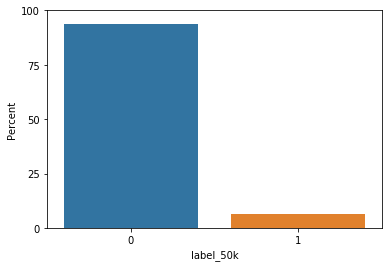

In [13]:
g1 = sns.barplot(x="label_50k", y="label_50k", data=source_train, estimator=lambda x: len(x) / len(source_train) * 100)
g1.set(ylabel="Percent",yticks=[0,25,50,75,100])

Damn! **This looks quite unbalanced**! Lets have a closer look..

In [14]:
#lets remove these observations
# how many 1 labels are in the initial data set?
initial_0=source_train[source_train["label_50k"]==0].count()[0]
initial_1=source_train[source_train["label_50k"]==1].count()[0]
total=source_train.count()[0]
ratio=(1-initial_0/total)
print("There are "+ str(initial_0)+" label_50k==0 targets and "+str(initial_1)+" label_50k==1, giving a ratio of "+str(ratio))

There are 187140 label_50k==0 targets and 12382 label_50k==1, giving a ratio of 0.06205831938332618


Only around 6,3% make more then 50k! These numbers seem quite unreasonable on the first glance. But indeed, data is from 94-95 27,776.64 USD (1994, see WorldBank), so with an income of more then 50k one could be found in the upper percentiles.

However, working with unbalanced data is quite troublesome and therefore we have to think how to handle this issue properly.
There are different techniques and models to tackle this issue.

Let's get a step back and think about the problem and the data. 
We are interested in the whether a person makes more or less than $50,000 per year. Hence observations which naturally have no income can be dropped. Possible attributes could be:

     a.) The person might be to young
     b.) The person might be unemployed

Let's have a closer look 


In [15]:
print("There are "+ str(source_train[(source_train["age"]<18)].count()[0])+" children below 18 in our data")

There are 55992 children below 18 in our data


Thats quite a lot! Lets check if they really don't earn more then 50k.

In [16]:
print("There are "+ str(source_train[(source_train["age"]<18)& (source_train["label_50k"]==1)].count()[0])+" children below 18 in our data who earn more then 50k.")

There are 2 children below 18 in our data who earn more then 50k.


These 2 are outliers. Let's see how that distribution looks for observations up to 25:

In [17]:
print("There are "+ str(source_train[(source_train["age"]<25)].count()[0])+" adults below 25 in our data")
print("There are "+ str(source_train[(source_train["age"]<25)& (source_train["label_50k"]==1)].count()[0])+" adults below 25 in our data who earn more then 50k.")

There are 73816 adults below 25 in our data
There are 113 adults below 25 in our data who earn more then 50k.


113 out of 73816 are definitely less then 6,3%, so for the sake of our prediction we will ignore these poor adults :) It also tells us that age might have a significant effect...

We will come to that later but now lets have first a closer look on the unemployment ratio. We will use the "full_or_part_time_employment_stat" as an indicator for unemployment. Let's check the distribution (Note that we will remap following attributes to "unemployed"--> Not in labor force","Unemployed full-time","Unemployed part)

In [18]:
# we remap learn_source_test to check for unemployment. lets check the distribution of the variable full_or_part_time_employment_stat
source_train["full_or_part_time_employment_stat"]=source_train["full_or_part_time_employment_stat"].replace(["Not in labor force","Unemployed full-time","Unemployed part- time"], "Unemployed")
source_train.groupby(['label_50k', 'full_or_part_time_employment_stat']).size().reset_index().pivot(columns="label_50k", index="full_or_part_time_employment_stat", values=0)

label_50k,0,1
full_or_part_time_employment_stat,,
Children or Armed Forces,117895,5874
Full-time schedules,35370,5366
PT for econ reasons usually FT,494,31
PT for econ reasons usually PT,1054,155
PT for non-econ reasons usually FT,2929,393
Unemployed,29398,563


Okay looks like we got around 30.000 unemployed (without childer as you can see they have their own category) of which only 563 earn more then 50k. As with the children. For the sake of prediction we will get rid of them 

In [19]:
#lets remove these observations
adults_train=source_train[source_train["age"]>25]
adults_train=adults_train[adults_train["full_or_part_time_employment_stat"]!="Unemployed"]

initial_0=adults_train[source_train["label_50k"]==0].count()[0]
initial_1=adults_train[source_train["label_50k"]==1].count()[0]
total=adults_train.count()[0]
ratio=(1-initial_0/total)
print("There are "+ str(initial_0)+" label_50k==0 targets and "+str(initial_1)+" label_50k==1, giving a ratio of "+str(ratio))

There are 88269 label_50k==0 targets and 11659 label_50k==1, giving a ratio of 0.11667400528380434


The ratio now improved to 0.1166 which is definitely way better to work with. It's still not the best and I expect that it might be quite troublesome to build models which predict proper 1 targets! We come to that later...

Let's repeat the steps above for the test set to keep consistency...

In [20]:
#adjusting the train data set
source_test["hispanic_origin"].fillna("Not clear", inplace=True)
source_test["full_or_part_time_employment_stat"]=source_test["full_or_part_time_employment_stat"].replace(["Not in labor force","Unemployed full-time","Unemployed part- time"], "Unemployed")
adults_test=source_test[source_test["age"]>25]
adults_test=adults_test[adults_test["full_or_part_time_employment_stat"]!="Unemployed"]

initial_0=adults_test[adults_test["label_50k"]==0].count()[0]
initial_1=adults_test[adults_test["label_50k"]==1].count()[0]
total=adults_test.count()[0]
ratio=(1-initial_0/total)
print("There are "+ str(initial_0)+" label_50k==0 targets and "+str(initial_1)+" label_50k==1, giving a ratio of "+str(ratio))

There are 44253 label_50k==0 targets and 5815 label_50k==1, giving a ratio of 0.11614204681632978


Looks like our test data set has now almost the same ratio!

In the next step we will have a closer look on a few variables which might be interesting to observe. As a good old econometrics graduate my own neural net tells me that that follow variables might influence income:
- education (hopefully!)
- gender (hopefully not!)
- age
- weeks worked per year (hopefully!)
- wage per hour

We will use a different data set to work with because we might do some manipulation we don't want to see in our dataset!

In [21]:
EDA_data=source_train.copy()

In [22]:
EDA_data.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_vet,veterans_benefits,weeks_worked_in_year,year,label_50k
0,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0
1,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,0
2,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0
3,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0
4,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,...,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,0


In [23]:
## Explantory data analysis
sns.set(style="whitegrid",rc={'figure.figsize':(20,12)})

Let's use some some barplots. Barplots are a good tool to get an initial idea. 
Specifically the error bars representing the confidence interval gives us a good understanding on how important a variable might be

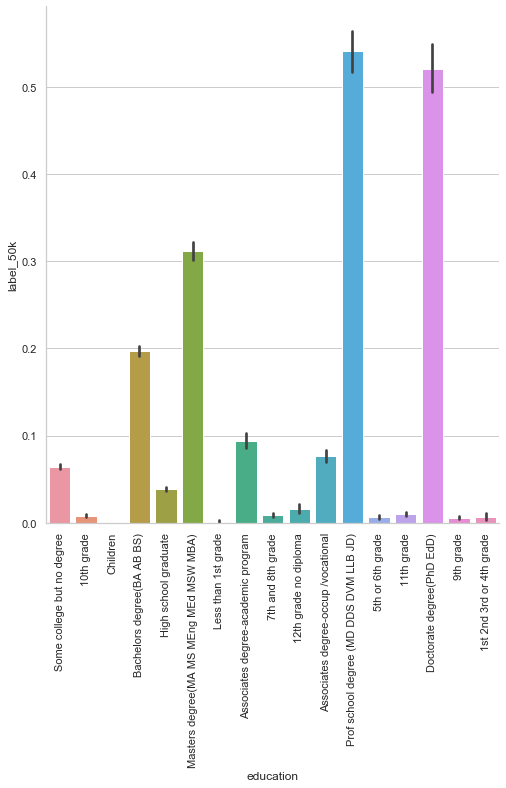

In [24]:
g1 = sns.factorplot(x="education",y="label_50k",data=EDA_data,kind="bar",size=8)
g1.set_xticklabels(rotation=90)

This is definetly too much information. Let's remap it...

In [25]:
EDA_data["education"].unique()

array(['Some college but no degree', '10th grade', 'Children',
       'Bachelors degree(BA AB BS)', 'High school graduate',
       'Masters degree(MA MS MEng MEd MSW MBA)', 'Less than 1st grade',
       'Associates degree-academic program', '7th and 8th grade',
       '12th grade no diploma', 'Associates degree-occup /vocational',
       'Prof school degree (MD DDS DVM LLB JD)', '5th or 6th grade',
       '11th grade', 'Doctorate degree(PhD EdD)', '9th grade',
       '1st 2nd 3rd or 4th grade'], dtype=object)

In [26]:
EDA_data["education"]=EDA_data["education"].replace(["Associates degree-academic program","Associates degree-occup /vocational","Prof school degree (MD DDS DVM LLB JD)","Bachelors degree(BA AB BS)"], "Bachelor or similar")
EDA_data["education"]=EDA_data["education"].replace(["High school graduate","Some college but no degree" ], "High School")
EDA_data["education"]=EDA_data["education"].replace(["10th grade","7th and 8th grade","11th grade","9th grade","12th grade no diploma"], "5-12 grade")
EDA_data["education"]=EDA_data["education"].replace(["5th or 6th grade","1st 2nd 3rd or 4th grade","Less than 1st grade"], "less then 6 grade")
EDA_data["education"]=EDA_data["education"].replace(["Masters degree(MA MS MEng MEd MSW MBA)","Doctorate degree(PhD EdD)"], "Master or higher")
EDA_data["education"].unique()

array(['High School', '5-12 grade', 'Children', 'Bachelor or similar',
       'Master or higher', 'less then 6 grade'], dtype=object)

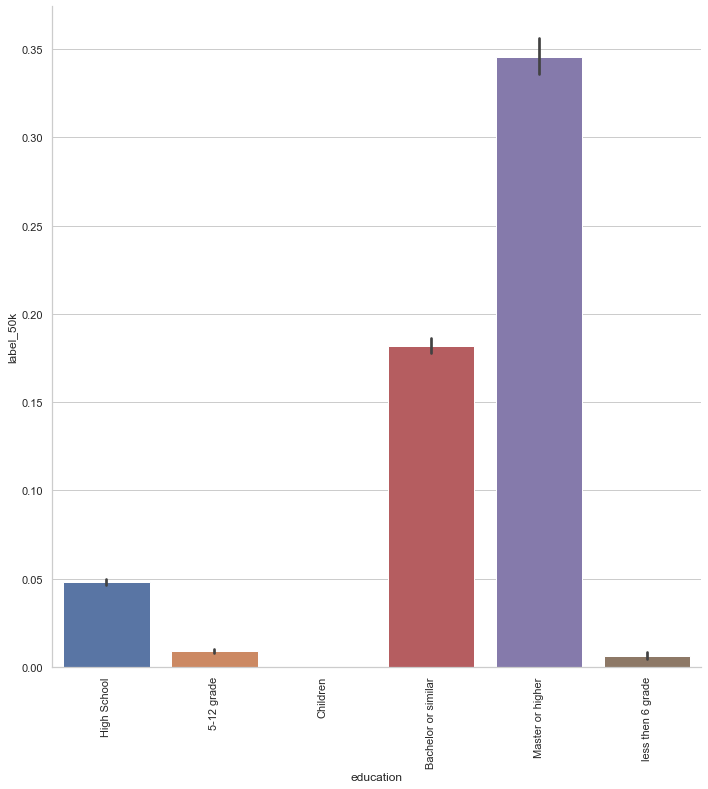

In [27]:
g2 = sns.factorplot(x="education",y="label_50k",data=EDA_data,kind="bar",size=10)
g2.set_xticklabels(rotation=90)

Looks like that the better the education, the more likely it is to earn more then 50k! Specifically, take a closer look on the error bars/ CI.

Let's have look on gender...

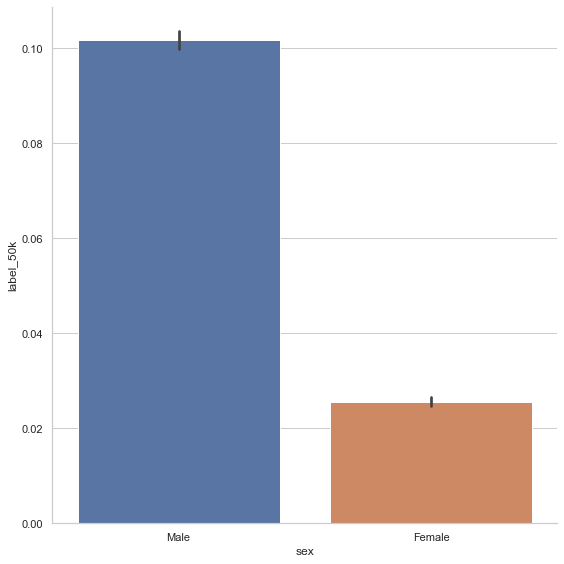

In [28]:
g = sns.factorplot(x="sex",y="label_50k",data=EDA_data,kind="bar", size = 8)

Okay looks like being a woman reduces the probability of getting more then 50k significantly. That is not surprising to me because nowadays and especially in 94' the gender pay gap existed.

Let's check if an explanation could be different education levels among gender...

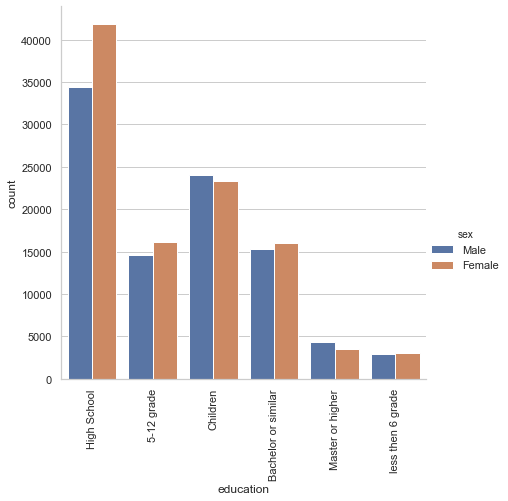

In [29]:
g4=sns.catplot(x="education", kind="count", hue="sex", data=EDA_data, size=6)
g4.set_xticklabels(rotation=90)

The distribution among gender with respect to education looks almost identical which can not be an explanation for this huge gap.
One hypothesis might be that men work more likely in a full-time position then women. 

Let's first check if working full-time actually increases probability of being a target...

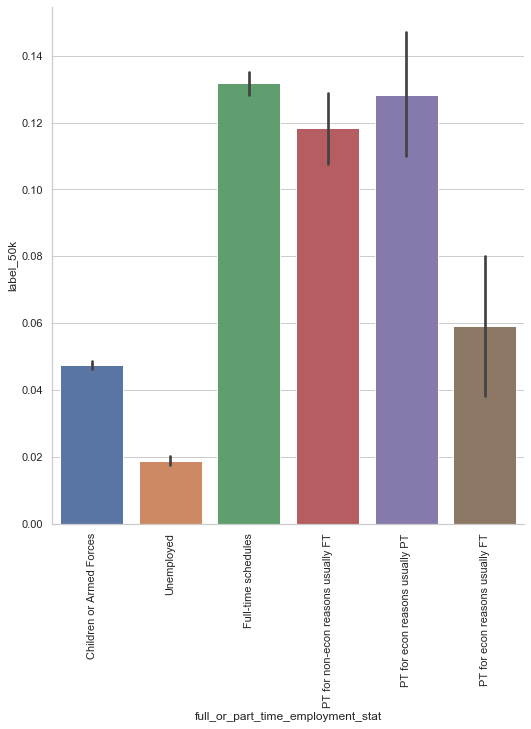

In [30]:
g5 = sns.factorplot(x="full_or_part_time_employment_stat",y="label_50k",data=EDA_data,kind="bar", size = 8)
g5.set_xticklabels(rotation=90)

It does. Ignore the "Children or Armed Forces" label because children were excluded in the steps before, as you might remember. For some reason the creator of the dataset categorized children and armed forces into the same category (which is actually really strange but also a bit funny).

Let's check our hypothesis now if women actually work more part time/less full time...

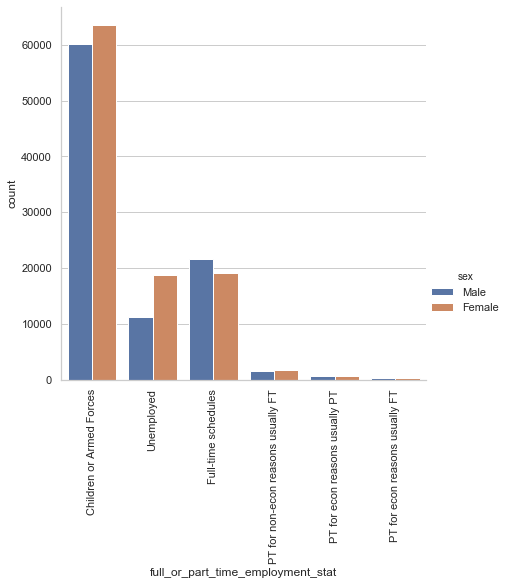

In [31]:
g4=sns.catplot(x="full_or_part_time_employment_stat", kind="count", hue="sex", data=EDA_data, size=6)
g4.set_xticklabels(rotation=90)

Indeed, women tend to work less full-time (maybe because they have to take care of their children?) but can this be the only explanation for the income gap between gender? I doubt it. Maybe an explanation could be that gender oppression is reproduced culturally and maintained through institutionalized inequality. By privileging men at the expense of women and refusing to acknowledge traditional domestic labor as equally valuable, the working-class male is cultured into an oppressive structure which marginalizes the female (Thanks to Ferguson, Ann; Hennessy, Rosemary (2010), "Feminist perspectives on class and work" for that quote) 
=)

Okay let's leave philosophy for a bit and continue in our explanatory data analysis. Let's have look on the age variable. As we saw in our cleaning process, the older our sample, the more targets we got. Let's check the distribution of the age variable with respect to our targets.

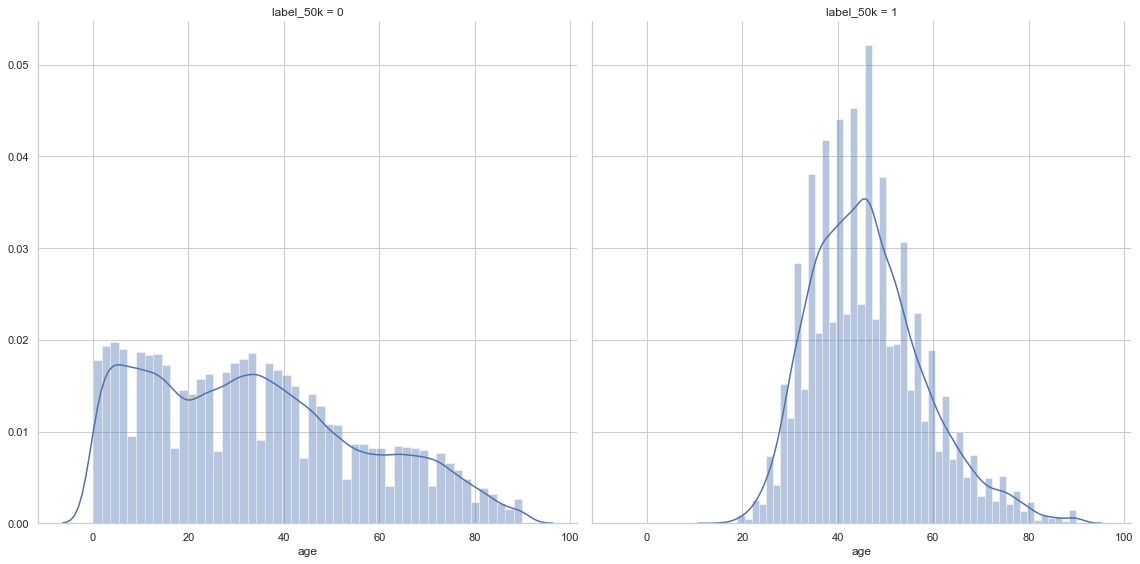

In [32]:
g = sns.FacetGrid(EDA_data, col='label_50k',size=8)
g = g.map(sns.distplot, "age")

The distribution of age with respect of earning less then 50k is more right-skewed. On the other side, the right plot looks more normally distributed with a mode at around 45. So age might definetly play a role as we suggested (which might bring us back to philosophy I guess...)

Let's have a look on the variable "weeks_worked_in_year" using a scatter plot...Hopefully working more pays off!

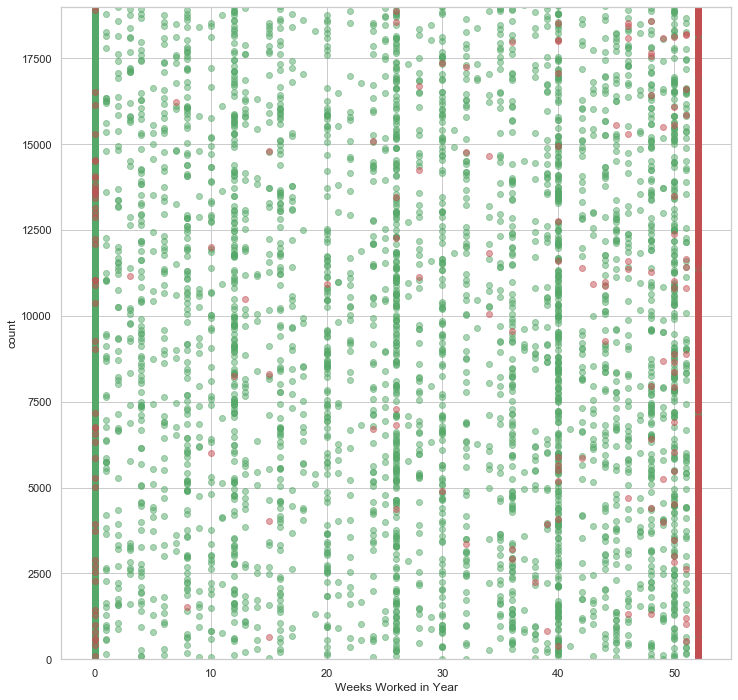

In [33]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(EDA_data.loc[EDA_data.label_50k==0,'weeks_worked_in_year'],EDA_data.loc[EDA_data.label_50k==0].index,alpha=0.5,color='g')
ax.scatter(EDA_data.loc[EDA_data.label_50k==1,'weeks_worked_in_year'],EDA_data.loc[EDA_data.label_50k==1].index,alpha=0.5,color='r')
ax.set_ylim((0,19000))
ax.set_xlabel('Weeks Worked in Year')
ax.set_ylabel('count');

In this scatterplot we can see that a huge amount of red (red=target) observations worked more then 52 weeks a year. So it looks like working more pays off (I hope this counts for me as well because I am doing this besides my consulting job in the night times :) )


Let's finally have a look on the variable "wage_per_hour" since it might have a strong correlation, if one might expect
wage_per_hour

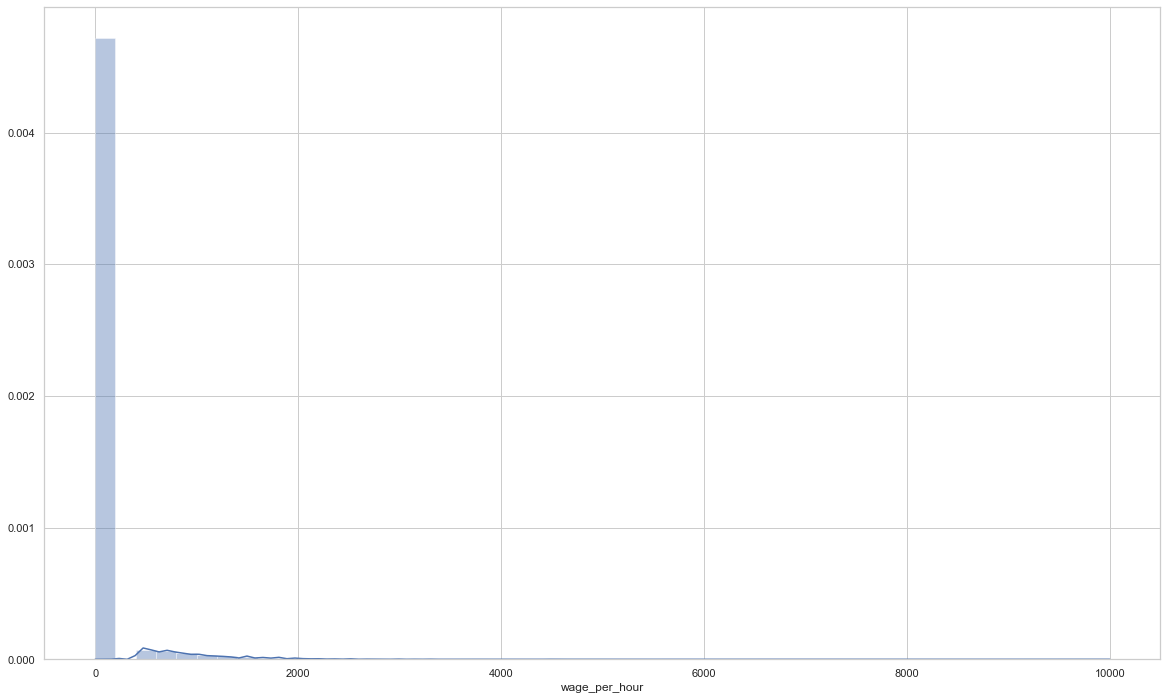

In [34]:
sns.distplot(EDA_data["wage_per_hour"])

That looks like a weird distribution let's have a closer look if this data might be corrupt...

In [35]:
EDA_data[EDA_data["wage_per_hour"]==0].count()[0]

188218

Looks like almost all observations observations make $0 per hour? This doesn't make sense. However maybe I misunderstood the meaning of the variable, so let's leave it how it is.

###  3) Preprocessing and Feature Engineering

We will first define our test and train sets. We will also get rid of our "instance_weight" column because according to the metafile it should be ignored.

In [36]:
from sklearn import preprocessing # for preprocessing 
from sklearn.preprocessing import StandardScaler #for scaling


X_train = adults_train.drop(["instance_weight","label_50k"], axis=1)
y_train = adults_train["label_50k"]
X_test = adults_test.drop(["instance_weight","label_50k"], axis=1)
y_test = adults_test["label_50k"]

We identified a few variables which might have a great impact. I prefer to work with a meaningful order of my columns so I will reshuffle my columns a bit first. Note that I worked with a different dataset in the EDA analysis in chapter 2).


In [37]:
X_train = X_train[["education","weeks_worked_in_year","reason_for_unemployment","full_or_part_time_employment_stat", "sex","race","age","industry_code","occupation_code","wage_per_hour","marital_status","class_of_worker",
                  "year","own_business_or_self_employed","country_of_birth_father","country_of_birth_mother","country_of_birth_self",
              "citizenship","enrolled_in_edu_inst_last_wk", "major_industry_code",
               "major_occupation_code", "hispanic_origin","member_of_a_labor_union","capital_gains","capital_losses","divdends_from_stocks","num_persons_worked_for_employer",
              "veterans_benefits",
              "region_of_previous_residence","state_of_previous_residence","detailed_household_and_family_stat",
              "tax_filer_status","detailed_household_summary_in_household","migration_code_change_in_msa","migration_code_change_in_reg","migration_code_move_within_reg",
              "live_in_this_house_1_year_ago","migration_prev_res_in_sunbelt","family_members_under_18","fill_inc_questionnaire_for_vet"]]

X_test= X_test[["education","weeks_worked_in_year","reason_for_unemployment","full_or_part_time_employment_stat", "sex","race","age","industry_code","occupation_code","wage_per_hour","marital_status","class_of_worker",
                  "year","own_business_or_self_employed","country_of_birth_father","country_of_birth_mother","country_of_birth_self",
              "citizenship","enrolled_in_edu_inst_last_wk", "major_industry_code",
               "major_occupation_code", "hispanic_origin","member_of_a_labor_union","capital_gains","capital_losses","divdends_from_stocks","num_persons_worked_for_employer",
              "veterans_benefits",
              "region_of_previous_residence","state_of_previous_residence","detailed_household_and_family_stat",
              "tax_filer_status","detailed_household_summary_in_household","migration_code_change_in_msa","migration_code_change_in_reg","migration_code_move_within_reg",
              "live_in_this_house_1_year_ago","migration_prev_res_in_sunbelt","family_members_under_18","fill_inc_questionnaire_for_vet"]]


Lets encode all our categorical variables with the label encoder first...

In [38]:
X_train["education"].unique()

array(['Some college but no degree', 'Bachelors degree(BA AB BS)',
       'High school graduate', '10th grade',
       'Masters degree(MA MS MEng MEd MSW MBA)',
       'Associates degree-academic program', '7th and 8th grade',
       '12th grade no diploma', 'Associates degree-occup /vocational',
       'Prof school degree (MD DDS DVM LLB JD)', '5th or 6th grade',
       'Less than 1st grade', '11th grade', 'Doctorate degree(PhD EdD)',
       '9th grade', '1st 2nd 3rd or 4th grade'], dtype=object)

In [39]:
# encode 
categorical = [ "class_of_worker", "education", "enrolled_in_edu_inst_last_wk", "marital_status", "major_industry_code",
               "major_occupation_code","race","hispanic_origin", "sex","member_of_a_labor_union","reason_for_unemployment",
              "full_or_part_time_employment_stat","region_of_previous_residence","state_of_previous_residence","detailed_household_and_family_stat",
              "tax_filer_status","detailed_household_summary_in_household","migration_code_change_in_msa","migration_code_change_in_reg","migration_code_move_within_reg",
              "live_in_this_house_1_year_ago","migration_prev_res_in_sunbelt","family_members_under_18","country_of_birth_father","country_of_birth_mother","country_of_birth_self",
              "citizenship","own_business_or_self_employed","fill_inc_questionnaire_for_vet"]

for feature in categorical:
        label_encode = preprocessing.LabelEncoder()
        X_train[feature] = label_encode.fit_transform(X_train[feature])
        X_test[feature] = label_encode.transform(X_test[feature])

#X_train.info()

One of the most common steps of feature engineering is the scaling of our categorical explanatory variables. We could use different approaches to rescale our variables. For the sake of simplicity we simply use the standard scaler

In [40]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train.head()

,education,weeks_worked_in_year,reason_for_unemployment,full_or_part_time_employment_stat,sex,race,age,industry_code,occupation_code,wage_per_hour,...,detailed_household_and_family_stat,tax_filer_status,detailed_household_summary_in_household,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,family_members_under_18,fill_inc_questionnaire_for_vet
0,1.301179,0.655474,-0.029953,-0.607375,1.016549,0.375158,0.805422,-1.175267,1.153785,-0.256315,...,-0.715850,-1.830392,-0.646376,-0.308487,1.140130,1.098226,-2.267447,1.799096,0.0,0.074489
1,1.301179,0.655474,-0.029953,0.625787,-0.983721,-4.566197,0.124730,0.892667,-0.500658,3.061093,...,1.297681,-0.459226,1.368359,-1.207255,-1.231546,-1.228729,-0.705527,-1.209071,0.0,0.074489
2,-0.267700,0.655474,-0.029953,-0.607375,1.016549,0.375158,-0.283685,0.548011,-0.983203,-0.256315,...,-0.715850,-0.459226,-0.646376,0.889870,0.801319,0.807357,0.856392,0.796374,0.0,0.074489
3,1.301179,0.655474,-0.029953,0.625787,-0.983721,0.375158,0.056661,1.064995,0.602304,2.165392,...,1.297681,-0.459226,1.368359,-1.207255,-1.231546,-1.228729,-0.705527,-1.209071,0.0,0.074489
4,1.301179,0.655474,-0.029953,-0.607375,1.016549,0.375158,-0.828239,-1.175267,1.360590,-0.256315,...,-0.715850,-0.459226,-0.646376,0.889870,0.801319,0.807357,0.856392,0.796374,0.0,0.074489


We have to work with quite a few columns in our data set. In order to increase performance a common step is to use Principal Component Analysis. It will give us a number of dimensions/variables we have to keep in order to explain a certain amount of our variance...

In [41]:
## PCA Analysis
from sklearn.decomposition import PCA
pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.95) + 1
print('The number of dimensions required to preserve 95% of variance is',dim)

The number of dimensions required to preserve 95% of variance is 28


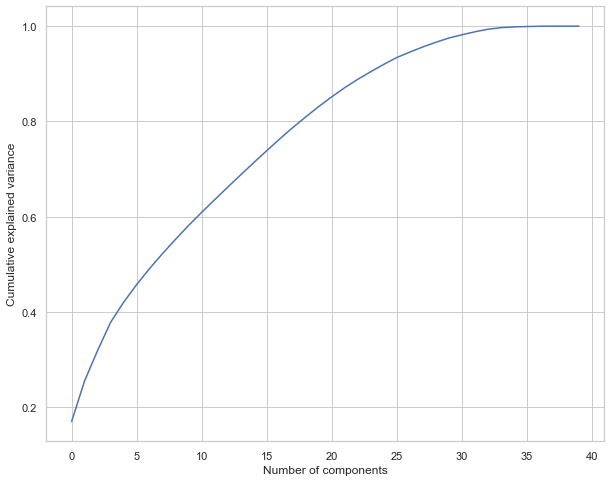

In [42]:
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

As we see, 28 variables are enough to explain 95% of our variance. Let's check if that is actually true.

**Note that due to the unbalance target variable, the accuracy score is an unreliable metrics because it underestimates the effect of the false positives and true negatives. For further analysis we will use the f1-score and the confusion matrix to measure our prediction performance.**

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Logistic Regression f1 score with all the features: {0:0.4f}". format(f1_score(y_test, y_pred)))
#looks great but our dataset is quite unbalanced. Therefore we have to check for other metrics like the F1_score

Logistic Regression f1 score with all the features: 0.4073


### 4.) Model Selection

We saw that the logistic regression performs quite poorly with respect to the f1-score. Lets check if we find better models.
According to my experience, tree models perform quite well on these kind of problems and for the sake of simplicity we will stick to them in our analysis.
We will therefore measure the performance of the following models using k-fold:
    - Decision Tree Classifier
    - AdaBoostClassifier
    - RandomForestClassifier
    - the famous XGBoost (which gives me most hope :) )
    
Note that this might take a few minutes...

In [46]:
#import all necessary data sets
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier,plot_importance #We use xgboost in the latter..
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold


In [47]:
seed = 77
num_folds = 10

models = []
models.append(('CART', DecisionTreeClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=100, max_features=6)))
models.append(("XGBoost",XGBClassifier(learning_rate=0.1, n_estimators=100,max_depth=6, objective='binary:logistic',
                    silent=True, nthread=1)))

# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train_pca, y_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

CART: 0.478049 (0.007066)
ADA: 0.501945 (0.014774)
RF: 0.557009 (0.007704)
XGBoost: 0.573472 (0.012362)


## 5) Parameter Tuning 
XGBoost performs best so will continue with that.

In the following, we will use a grid search algorithm to tune our XGBoost. To keep it simple, we will focus only on the learning rate & n_estimators. All other parameters were set according to my expert judgment (and many thanks to https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e)

**Note that the next algorithm took a while, so it will be outcommented!**

In [48]:
# xgbpara = {
#         "learning_rate":[0.01, 0.1],
#         "n_estimators":[100,500],
#         'min_child_weight': [0],
#         'gamma': [0],
#         'subsample': [0.75],
#         'colsample_bytree': [0.75],
#         'max_depth': [10]
#         }


# param_grid = dict(param)
# model = XGBClassifier()
# kfold = KFold(n_splits=num_folds, random_state=seed)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="f1", cv=kfold)
# grid_result = grid.fit(X_train_pca, y_train)
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

## 6) Scoring

Let's finally score our test data.

Our best estimate is 
*0.587749 using {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 0, 'n_estimators': 100, 'subsample': 0.75}*

We will continue using these parameters...

In [49]:
xg_reg_final = XGBClassifier(learning_rate=0.1, n_estimators=100,max_depth=10, objective='binary:logistic',
                             colsample_bytree= 0.75, gamma=0, min_child_weight=0,subsample=0.75)

In [50]:
xg_reg_final.fit(X_train_pca,y_train)
preds_final = xg_reg_final.predict(X_test_pca)

In [51]:
f1_score(y_test,preds_final>0.5)

0.5930513278051852

In [52]:
confusion_matrix(y_test,preds_final>0.5)


array([[43366,   887],
       [ 2990,  2825]], dtype=int64)

So there we are. We get a final f1-score of almost 60%! This is a huge improvement compared to our initial logistic regression results but there is definitely some room for improvement. I would therefore suggest to work on the following (with respect to unbalanced target ratio):
    - further feature engineering
    - different Resampling Techniques
    - Penalized Models
    - Neural Nets
    - further Hyperparameter-Tuning

And finally let's have a further look on feature importance of our XGB model...
**Note that this plot might only with graphiz. In that case install "pip install graphviz"***

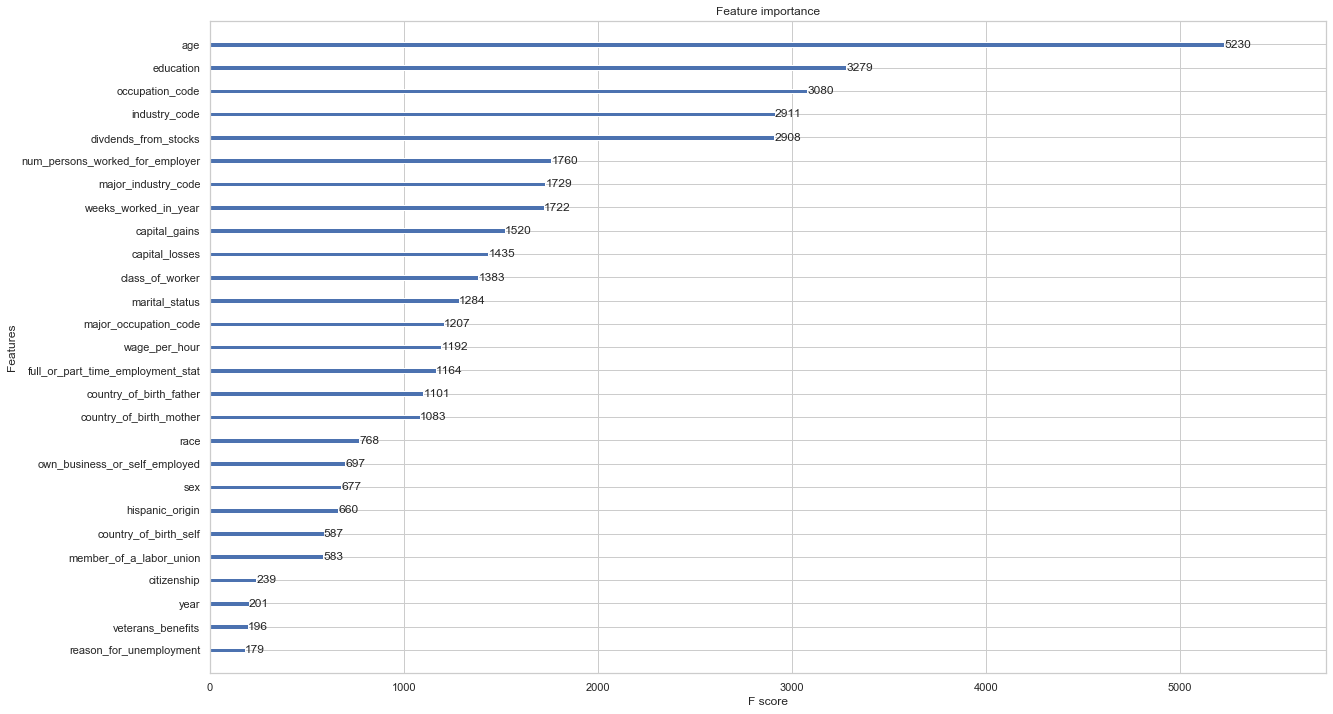

In [53]:
import matplotlib.pyplot as plt

plot_importance(xg_reg_final)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

"Age", "education" and "weeks_worked_in_year" seem to have the highest impact according to our XGBModel. Gender, however is quite unimportant but still plays some role! So maybe the world isn't that sexist as I expected :)

So I hope you enjoyed my notebook!

Thanks,

Konstantin